<a href="https://colab.research.google.com/github/davidrtorres/Deep_Learning/blob/main/image_digits_codebasics_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mnist dataset 

In [48]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [49]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [50]:
#we have 60,000 images
len(X_train)

60000

In [51]:
len(X_test)

10000

In [52]:
#by sample
#28 x 28 pixel image
X_train[0].shape

(28, 28)

In [53]:
# 2 dimnesional array
# 0 means black points
#255 is white. Between 0 and 255 values
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

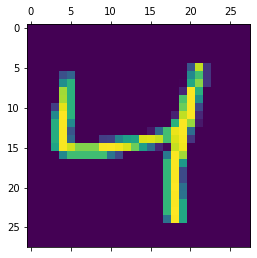

In [54]:
#plooting the 1st training image
plt.matshow(X_train[2])

In [55]:
y_train[2]

4

In [56]:
#contains a number between 0 to 9
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [57]:
#number of samples you have, each individual image 
X_train.shape

(60000, 28, 28)

In [58]:
#scale the data
"""
all values are in range 0 to 255
if divide whole array by 255 it will be scaled from 0 to 1
"""
X_train = X_train / 255
X_test = X_test/255

In [59]:
# now values are between 0 and 1 
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [60]:
"""
flatten training data set b/c we want to convert 28 x 28 image to single dimensional array
10,000 is number of image and 784 is dimension
"""
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

In [61]:
"""
converted from 2 dinesional array to single dimensional array
"""
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [62]:
"""
sequential means I'm having a stack of layers in my neural network
input is 784 neurons
output has 10 neurons (0 to 9)
optimizer- allow you to train efficiently, when training and back propogation is going on
loss function- like mean_squared_error
epochs-number of iterations that neural network is going to run the train

as time goes accurcy will increase
92% of hte time it will make an accurate prediction

loss functions:
-sparse_categorical_entropy
binary_crossentropy
mean_absolute_error - like the absolute distance
mean_squared_error-take error and do a square of it.Allows your gradiescent to converege in a better way.

Loss?
loss is in used in neural network training.
"""
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened,y_train, epochs=5) #this is where training happens

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4636 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9254


In [63]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2679 - accuracy: 0.9248


[0.26791200041770935, 0.9247999787330627]

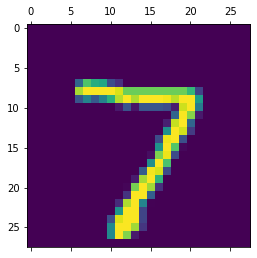

In [64]:
#1st image is a 7

plt.matshow(X_test[0])

In [65]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.5609268e-02, 5.0550790e-07, 6.4323440e-02, 9.6405149e-01,
       2.9514185e-03, 1.0830997e-01, 1.9138197e-06, 9.9976569e-01,
       1.1385545e-01, 7.0841670e-01], dtype=float32)

In [66]:
#it will find the maximum value
#this is hte prediction
np.argmax(y_predicted[0])

7

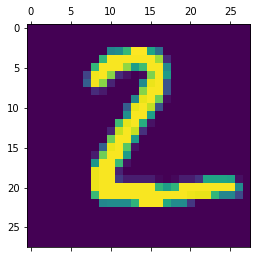

In [67]:
plt.matshow(X_test[1])

In [68]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([5.4613674e-01, 9.4162310e-03, 9.9941421e-01, 5.2592647e-01,
       9.3881591e-10, 8.5201192e-01, 8.6289531e-01, 6.8914248e-13,
       2.4359076e-01, 2.9900735e-09], dtype=float32)

In [69]:
np.argmax(y_predicted[1])

2

In [70]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [71]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [72]:
"""
confusion matrix
"""
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   9,   10,  912,   21,    9,    4,   12,    8,   43,    4],
       [   3,    0,   16,  933,    0,   17,    2,    8,   21,   10],
       [   2,    1,    3,    1,  914,    0,   11,    3,   10,   37],
       [  10,    3,    2,   43,    8,  762,   16,    5,   36,    7],
       [  12,    3,    7,    1,    7,   12,  911,    2,    3,    0],
       [   1,    7,   22,   11,   10,    1,    0,  932,    2,   42],
       [   7,    9,    6,   27,    9,   20,    9,    6,  872,    9],
       [  11,    7,    1,   10,   27,    5,    0,    9,    6,  933]],
      dtype=int32)>

Text(69.0, 0.5, 'True Label')

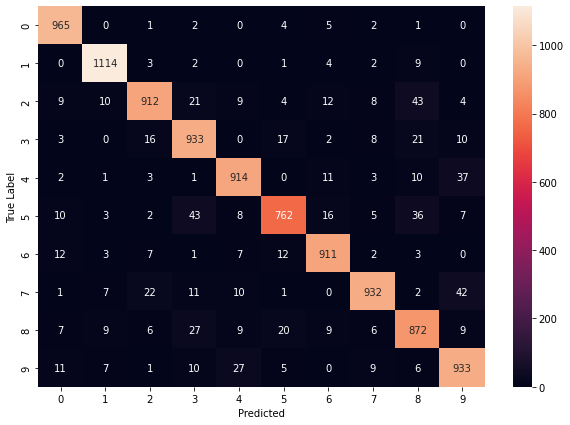

In [73]:
"""
Confusion matrix is good tool to evaluate performance of the model
965 times the label was 0 and out model predicted it to be 0.
0 predicted was correct 965 times
1110 times it was 1 and our model predcited it to be 1
when it was 2 our model peredicted it to be 1 11 times
-all numbers out of diagonal are errors
it was number 2 and 44 times it predcied it to be 8.
"""

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Label')

In [74]:
"""
hidden layers tend to improve performance
last layer doesn't need input shape. it knows how to get input shape from previous layer
need to specify number of neurons in hidden layer.  How many neurons do you want? less than input_shape

"""
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened,y_train, epochs=5) #this is where training happens

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2700 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1231 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0518 - accuracy: 0.9838


In [75]:
#model improved with another layer. 92% to 97%
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9734


[0.08810056746006012, 0.9733999967575073]

Text(69.0, 0.5, 'True Label')

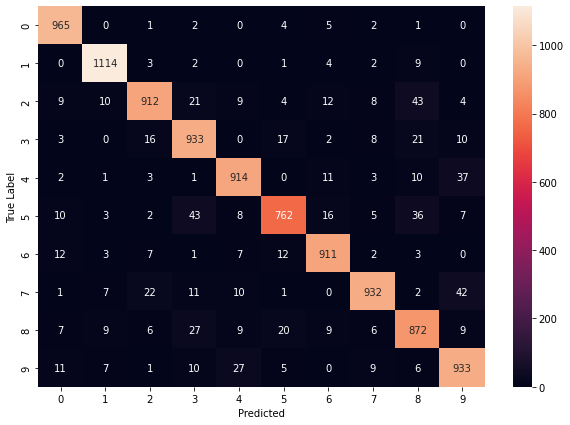

In [76]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Label')

In [77]:
# if I want keras to flatten for me
"""
try differnt values of:
optimizer
loss - Tensorflow loss functions
metric

"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train, epochs=5) #this is where training happens

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2755 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1252 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0877 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9847


In [78]:
"""
Why activation functions are needed?
sigmoid function or activation function is helpful in output layer
activation function helps build non-linear equation
tanh-instead of giving range of 0 to 1, it gives an output between -1 and 1.
Use sigmoid in output layer
    All other places use tanh- tanh is usually better than sigmoid.
    tanh will calculate a mean of 0 and it will center your data.
"""
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [79]:
#convertd it to 1
sigmoid(100)

1.0

In [80]:
#any output from sigmoid will be in range from 0 to 1
sigmoid(1)

0.7310585786300049

In [81]:
#close to 0
sigmoid(-56)

4.780892883885469e-25

In [82]:
#the 2nd variant of sigmoid is tanh
def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [83]:
#will convert a value to -1 to 1
tanh(-56)

-1.0

In [84]:
tanh(50)

1.0

In [85]:
tanh(1)

0.7615941559557649

In [86]:
#max between 0 and x
def relu(x):
    return max(0,x)

In [87]:
relu(-7)

0

In [88]:
relu(1)

1

In [89]:
relu(6)

6

In [90]:
def leaky_relu(x):
    return max(0.1 * x,x)

In [91]:
leaky_relu(-100)

-10.0

In [92]:
#postive value stays the same
leaky_relu(1)

1